In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use(['science'])
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = "medium"
mpl.rcParams['ytick.labelsize'] = "medium"
mpl.rcParams['legend.fontsize'] = "large"
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1
mpl.rcParams['lines.linewidth'] = 1.5

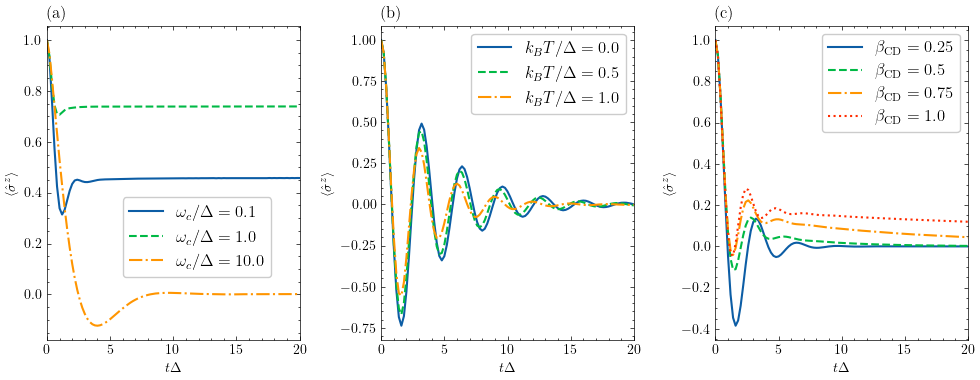

In [2]:
fig = plt.figure(figsize=(10, 4))
axis = fig.subplots(1, 3)
linestyles = ["-", "--", "-.", ":"]

plt.sca(axis[0])

omega_list = ["001", "010", "100"]
local_dict = {
o:f"./Fig3a/ps1_binary_ita100_omega{o}_beta050.log" for o in omega_list
}
for omega in omega_list:

    with open(local_dict[omega]) as fin:
        lines = fin.readlines()
    zs = [1]
    good = False
    for line in lines:
        if "expander bond dimension" in line:
            good = True
        if good and len(line.split()) == 4:
            # print(line.split())
            z = float(line.split()[2][1:-1])
            x = float(line.split()[-1][:-1])
            zs.append(z)
    time = np.arange(len(zs))*0.2
    plt.plot(time, zs, label=r"$\omega_c/\Delta=" + str(float(omega)/10) + "$", linestyle=linestyles[omega_list.index(omega)])

    #data = mctdh_data(mctdh_dict[temperature])
    #plt.plot(data[:, 0], data[:, 1], color="black", zorder=-1)

plt.title("(a)", loc="left")
plt.legend(loc=(0.3, 0.2))
plt.xlabel(r"$t\Delta$")
plt.ylabel(r"$\langle \hat \sigma^z \rangle$")
plt.xlim(0, 20)


plt.sca(axis[1])

temperature_list = ["00", "05", "10"]
local_dict = {
o:f"./Fig4a-modes250/ps1_binary_Ms96_ita010_omega010_beta025_temperature{o}.log" for o in temperature_list
}
for temperature in temperature_list:

    with open(local_dict[temperature]) as fin:
        lines = fin.readlines()
    zs = [1]
    good = False
    for line in lines:
        if "expander bond dimension" in line:
            good = True
        if good and len(line.split()) == 4 and line.split()[2][0] == "(":
            # print(line.split())
            z = complex(line.split()[2][1:-1])
            x = complex(line.split()[-1][:-1])
            zs.append(z)
    time = np.arange(len(zs))*0.2
    plt.plot(time, np.array(zs).real, label=r"$k_BT/\Delta=" + str(float(temperature)/10) + "$", linestyle=linestyles[temperature_list.index(temperature)])

    #data = mctdh_data(mctdh_dict[temperature])
    #plt.plot(data[:, 0], data[:, 1], color="black", zorder=-1)

plt.title("(b)", loc="left")
plt.legend()
plt.xlabel(r"$t\Delta$")
plt.ylabel(r"$\langle \hat \sigma^z \rangle$")
plt.xlim(0, 20)


plt.sca(axis[2])

beta_list = ["025", "050", "075", "100"]
local_dict = {
o:f"./Fig6b/ps1_binary_ita025_omega010_beta{o}.log" for o in beta_list
}
for beta in beta_list:

    with open(local_dict[beta]) as fin:
        lines = fin.readlines()
    zs = [1]
    good = False
    for line in lines:
        if "expander bond dimension" in line:
            good = True
        if good and len(line.split()) == 4:
            # print(line.split())
            z = float(line.split()[2][1:-1])
            x = float(line.split()[-1][:-1])
            zs.append(z)
    time = np.arange(len(zs))*0.2
    plt.plot(time, zs, label=r"$\beta_{\rm{CD}}=" + str(float(beta)/100) + "$", linestyle=linestyles[beta_list.index(beta)])

    #data = mctdh_data(mctdh_dict[temperature])
    #plt.plot(data[:, 0], data[:, 1], color="black", zorder=-1)

plt.title("(c)", loc="left")
plt.legend()
plt.xlabel(r"$t\Delta$")
plt.ylabel(r"$\langle \hat \sigma^z \rangle$")
plt.xlim(0, 20)

plt.tight_layout()
plt.savefig("cd_production.pdf")

(a) incoherent->coherent transition. omega = 1 is most incoherent (largest steady sigma_z)
(b)  temperature
(c) higher beta -> localization (above sec 3.2 of the reference paper)